In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [3]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


### Prepare the Dataset

In [4]:
cols = [
    "engine_displacement",
    "horsepower",
    "vehicle_weight",
    "model_year",
    "fuel_efficiency_mpg",
]

df = df.loc[:, cols]

In [5]:
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


### EDA

Look at the fuel_efficiency_mpg variable. Does it have a long tail?

<Axes: ylabel='Frequency'>

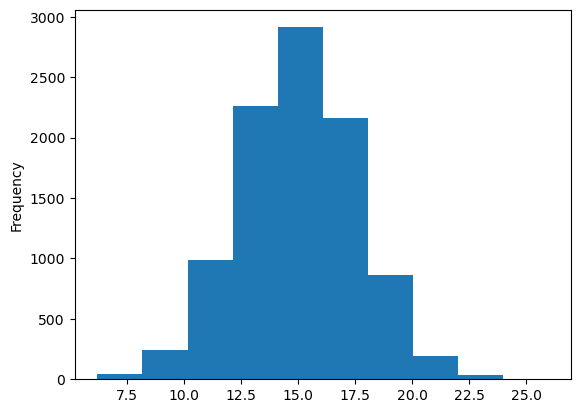

In [6]:
df.fuel_efficiency_mpg.plot(kind="hist")

No, it has a normal distribution.


Question 1: There's one column with missing values. What is it?

In [7]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

horsepower             708

Question 2: What's the median (50% percentile) for variable 'horsepower'?

In [8]:
df['horsepower'].describe()

count    8996.000000
mean      149.657292
std        29.879555
min        37.000000
25%       130.000000
50%       149.000000
75%       170.000000
max       271.000000
Name: horsepower, dtype: float64

50%       149.000000

### Prepare and split the dataset

Shuffle the dataset (the filtered one you created above), use seed 42.
Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [9]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

n == (n_train + n_test + n_val)

True

In [10]:
idx = np.arange(n)

np.random.seed(42)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]].copy()
df_val = df.iloc[idx[n_train : n_train + n_val]].copy()
df_test = df.iloc[idx[n_train + n_val :]].copy()
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209


Question 3: Which option gives better RMSE?

We need to deal with missing values for the column from Q1.

We have two options: fill it with 0 or with the mean of this variable.


* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)

Which option gives better RMSE?
* With 0
* With mean
* Both are equally good

In [11]:
target = "fuel_efficiency_mpg"
features = df.columns[df.columns != target].tolist()


def train_linear_regression(X, y):
    # Add a bias term (column of ones) to the feature matrix
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    # Normal equation: w = (X^T * X)^-1 * X^T * y
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]


def rmse(y_true, y_pred):
    error = y_true - y_pred
    mse = (error**2).mean()
    return np.sqrt(mse)

Replacing with Zero value:

In [12]:
# Filling missing horsepower with 0
X_train_zero = df_train[features].fillna(0).to_numpy()
y_train = df_train[target].to_numpy()

X_val_zero = df_val[features].fillna(0).to_numpy()
y_val = df_val[target].to_numpy()

# Train the model
w0_zero, w_zero = train_linear_regression(X_train_zero, y_train)

# Get predictions on the validation set
y_pred_zero = w0_zero + X_val_zero.dot(w_zero)

# Calculate and round the RMSE
rmse_zero = round(rmse(y_val, y_pred_zero), 2)

Replacing with Mean value:

In [13]:
# Mean of horsepower from training data
horsepower_mean = df_train["horsepower"].mean()

# Filling missing values with the calculated mean
X_train_mean = df_train[features].fillna(horsepower_mean).to_numpy()
X_val_mean = df_val[features].fillna(horsepower_mean).to_numpy()

# Notice that y_train and y_val are the same as before

# Train the model
w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)

# Get predictions on the validation set
y_pred_mean = w0_mean + X_val_mean.dot(w_mean)

# Calculate and round the RMSE
rmse_mean = round(rmse(y_val, y_pred_mean), 2)

rmse_zero, rmse_mean

(np.float64(0.52), np.float64(0.46))

Mean values provide the better RMSE

Question 4

Now let's train a regularized linear regression.


* For this question, fill the NAs with 0.
* Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.

Which r gives the best RMSE?
If multiple options give the same best RMSE, select the smallest r.

Options:
* 0
* 0.01
* 1
* 10
* 100

In [14]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [15]:
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_scores = {}

for r in r_values:
    # Train the regularized model
    w0, w = train_linear_regression_reg(X_train_zero, y_train, r=r)

    # Make predictions on the validation set
    y_pred = w0 + X_val_zero.dot(w)

    # Calculate and round the RMSE
    score = round(rmse(y_val, y_pred), 2)

    # Store the result
    rmse_scores[r] = score

    print(f"r = {r:<4} | RMSE = {score}")

r = 0    | RMSE = 0.52
r = 0.01 | RMSE = 0.52
r = 0.1  | RMSE = 0.52
r = 1    | RMSE = 0.52
r = 5    | RMSE = 0.52
r = 10   | RMSE = 0.52
r = 100  | RMSE = 0.52


The best 2 digit rounded RMSE is 0.52 under all values, but we select the lowest value: 0.

Question 5

We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.

* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.

What's the standard deviation of all the scores? To compute the standard deviation, use np.std.

Round the result to 3 decimal digits (round(std, 3))

What's the value of std?
* 0.001
* 0.006
* 0.060
* 0.600

In [16]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

for seed in seeds:
    # Set the seed for this iteration's data split
    np.random.seed(seed)

    # Shuffle the dataset indices
    n = len(df)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    idx = np.arange(n)
    np.random.shuffle(idx)

    # Create the data splits
    df_train = df.iloc[idx[:n_train]].copy()
    df_val = df.iloc[idx[n_train : n_train + n_val]].copy()
    df_test = df.iloc[idx[n_train + n_val :]].copy()

    # Prepare data (fill missing values with 0)
    X_train = df_train[features].fillna(0).to_numpy()
    y_train = df_train[target].to_numpy()

    X_val = df_val[features].fillna(0).to_numpy()
    y_val = df_val[target].to_numpy()

    # Train the model (without regularization)
    w0, w = train_linear_regression(X_train, y_train)
    y_pred = w0 + X_val.dot(w)

    # Calculate and store the score
    score = rmse(y_val, y_pred)
    rmse_scores.append(score)

    print(f"Seed: {seed} -> RMSE: {round(score, 3)}")

Seed: 0 -> RMSE: 0.521
Seed: 1 -> RMSE: 0.521
Seed: 2 -> RMSE: 0.523
Seed: 3 -> RMSE: 0.516
Seed: 4 -> RMSE: 0.511
Seed: 5 -> RMSE: 0.528
Seed: 6 -> RMSE: 0.531
Seed: 7 -> RMSE: 0.509
Seed: 8 -> RMSE: 0.515
Seed: 9 -> RMSE: 0.513


In [17]:
    # Standard deviation of the scores
    std_dev = round(np.std(rmse_scores), 5)
    print(f"Standard Deviation: {std_dev}")

Standard Deviation: 0.00699


Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with r=0.001.
  
What's the RMSE on the test dataset?
* 0.15
* 0.515
* 5.15
* 51.5

In [18]:
# Set the seed
np.random.seed(9)

# Split the data with 60%/20%/20% distribution
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.shuffle(idx)

# Create the data splits
df_train = df.iloc[idx[:n_train]].copy()
df_val = df.iloc[idx[n_train : n_train + n_val]].copy()
df_test = df.iloc[idx[n_train + n_val :]].copy()

# Combine train and validation datasets
df_train_val = pd.concat([df_train, df_val]).reset_index(drop=True)

In [19]:
# Prepare data (fill missing values with 0)
X_train_val = df_train_val[features].fillna(0).to_numpy()
y_train_val = df_train_val[target].to_numpy()

X_test = df_test[features].fillna(0).to_numpy()
y_test = df_test[target].to_numpy()

# Train the model with r=0.001
w0, w = train_linear_regression_reg(X_train_val, y_train_val, r=0.001)

# Make predictions on the test set
y_pred_test = w0 + X_test.dot(w)

# Calculate RMSE on the test set
rmse_test = round(rmse(y_test, y_pred_test), 4)

print(f"The RMSE on the test dataset is: {rmse_test}")

The RMSE on the test dataset is: 0.5156
